In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore") 

In [2]:
data=pd.read_csv("winequality-red.csv")
df=pd.DataFrame(data)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


ADDING NEW COLUMN TO DETERMINE GOOD AND BAD QUALITY

In [3]:
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


EDA PROCESS

In [4]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
goodquality               int64
dtype: object

NO NULL VALUES

In [5]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
goodquality             0
dtype: int64

In [6]:
df["goodquality"].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

AS THE TARGET VALUES ARE IMBALANCED WE USE SMOTE FOR OVER SAMPLING

In [7]:
dfx=df.iloc[:,:-1]
dfx

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [8]:
dfy=df.iloc[:,-1]
dfy

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: goodquality, Length: 1599, dtype: int64

In [9]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
trainx,trainy=smt.fit_resample(dfx,dfy)

In [10]:
trainx.value_counts()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density   pH        sulphates  alcohol    quality
7.200000       0.360000          0.460000     2.100000        0.074000   24.000000            44.000000             0.995340  3.400000  0.850000   11.000000  7          15
8.900000       0.120000          0.450000     1.800000        0.075000   10.000000            21.000000             0.995520  3.410000  0.760000   11.900000  7          14
9.400000       0.270000          0.530000     2.400000        0.074000   6.000000             18.000000             0.996200  3.200000  1.130000   12.000000  7           7
6.700000       0.280000          0.280000     2.400000        0.012000   36.000000            100.000000            0.990640  3.260000  0.390000   11.700000  7           6
8.300000       0.310000          0.390000     2.400000        0.078000   17.000000            43.000000             0.994440  3.310000  0.770000  

In [11]:
trainy.value_counts()

1    1382
0    1382
Name: goodquality, dtype: int64

In [12]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


<AxesSubplot:xlabel='goodquality', ylabel='total sulfur dioxide'>

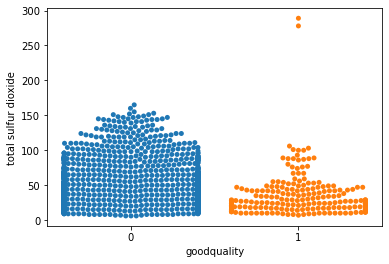

In [13]:
sns.swarmplot(x="goodquality",y="total sulfur dioxide",data=df)

<AxesSubplot:xlabel='goodquality', ylabel='residual sugar'>

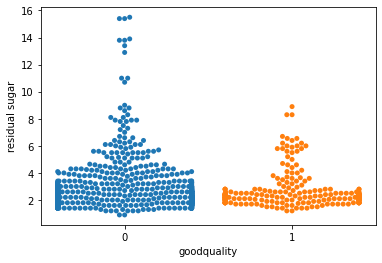

In [14]:
sns.swarmplot(x="goodquality",y="residual sugar",data=df)

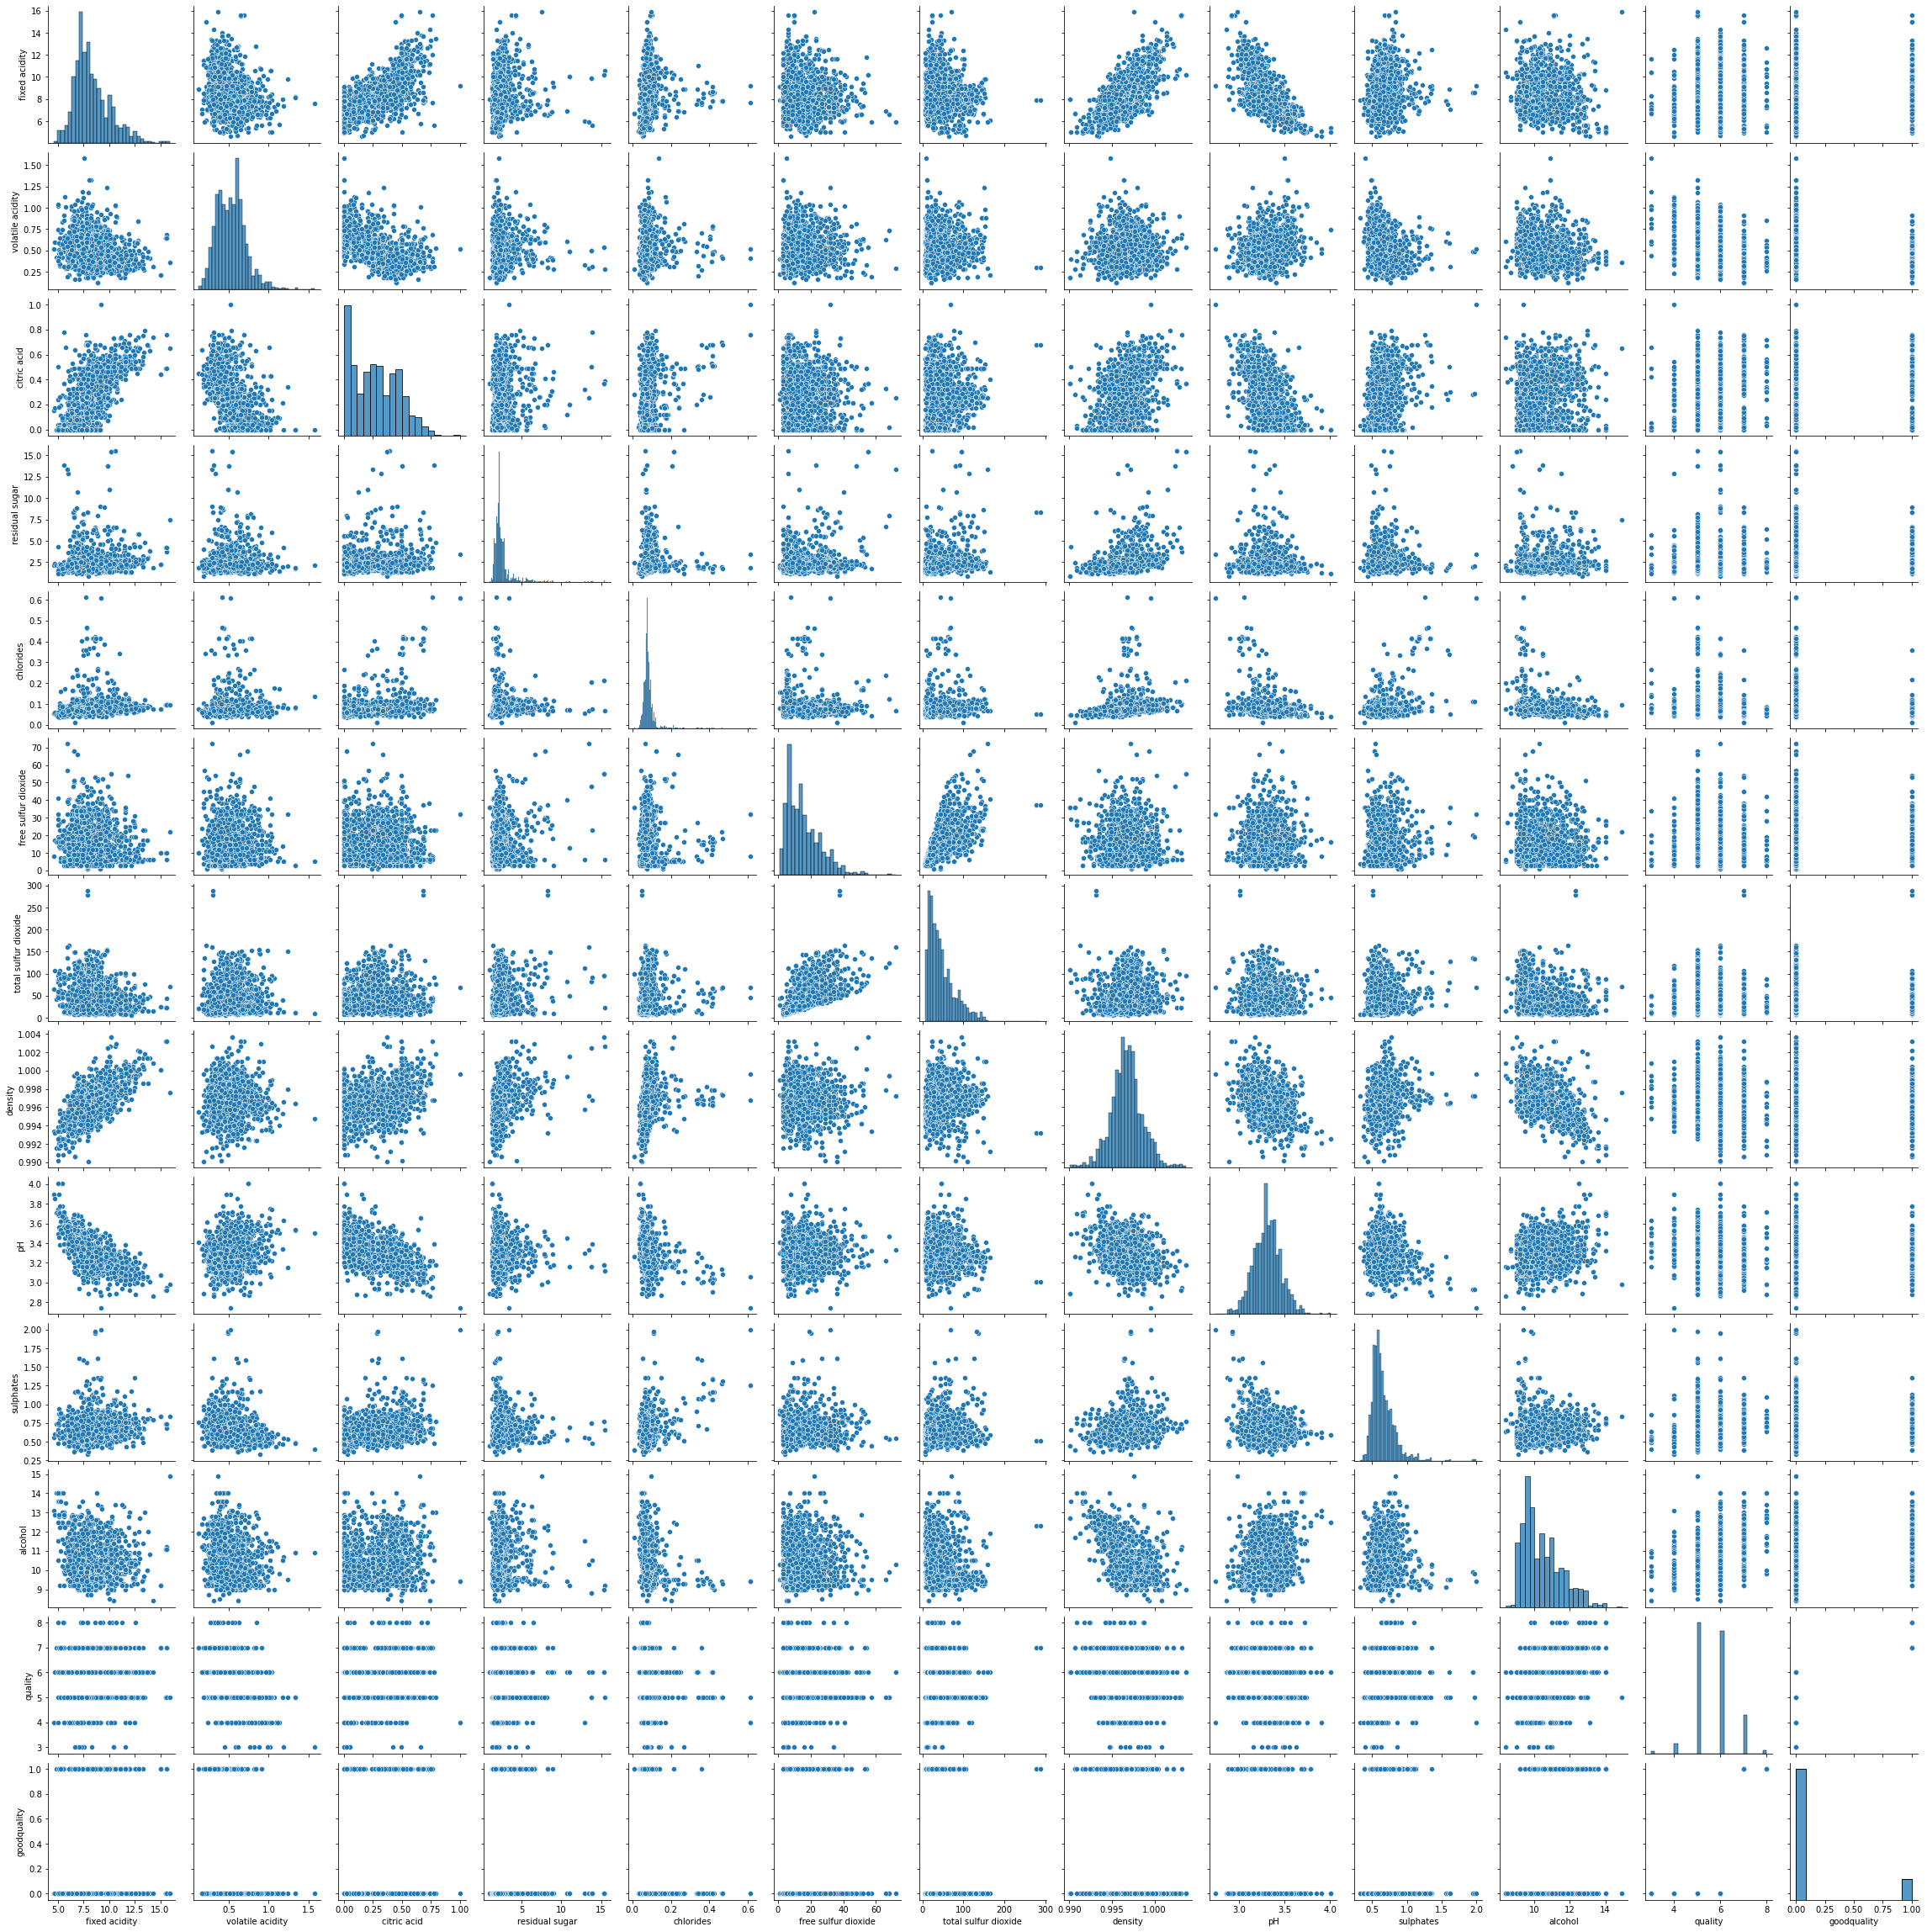

In [15]:
sns.pairplot(df)

In [16]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
goodquality             2.129363
dtype: float64

fixed acidity              AxesSubplot(0.125,0.749828;0.133621x0.130172)
volatile acidity        AxesSubplot(0.285345,0.749828;0.133621x0.130172)
citric acid              AxesSubplot(0.44569,0.749828;0.133621x0.130172)
residual sugar          AxesSubplot(0.606034,0.749828;0.133621x0.130172)
chlorides               AxesSubplot(0.766379,0.749828;0.133621x0.130172)
free sulfur dioxide        AxesSubplot(0.125,0.593621;0.133621x0.130172)
total sulfur dioxide    AxesSubplot(0.285345,0.593621;0.133621x0.130172)
density                  AxesSubplot(0.44569,0.593621;0.133621x0.130172)
pH                      AxesSubplot(0.606034,0.593621;0.133621x0.130172)
sulphates               AxesSubplot(0.766379,0.593621;0.133621x0.130172)
alcohol                    AxesSubplot(0.125,0.437414;0.133621x0.130172)
quality                 AxesSubplot(0.285345,0.437414;0.133621x0.130172)
goodquality              AxesSubplot(0.44569,0.437414;0.133621x0.130172)
dtype: object

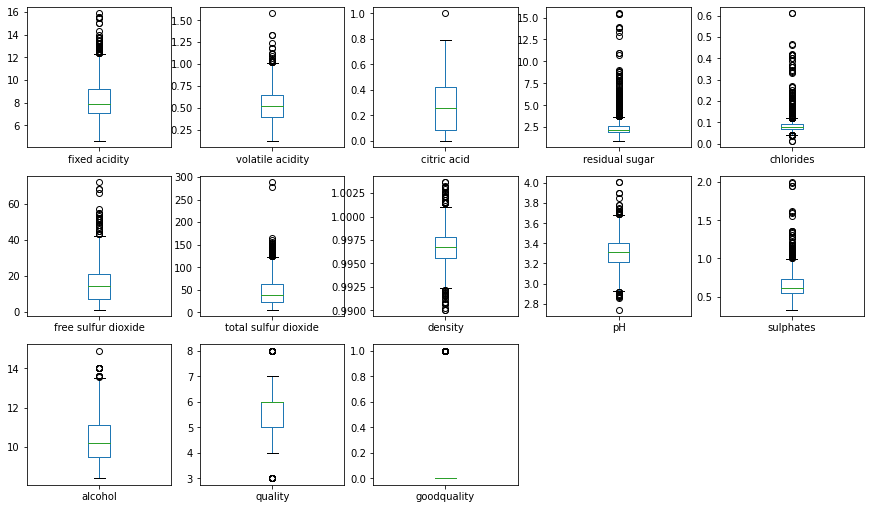

In [17]:
df.plot(kind="box",subplots=True,layout=(5,5),figsize=(15,15))

USING Z-SCORE METHOD TO REMOVE THE OUTLIERS

In [18]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.52835961, 0.96187667, 1.39147228, ..., 0.96024611, 0.78782264,
        0.39625599],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.58477711, 0.78782264,
        0.39625599],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.58477711, 0.78782264,
        0.39625599],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 0.54162988, 0.45084835,
        0.39625599],
       [1.39015528, 0.65462046, 0.77526673, ..., 0.20930812, 0.78782264,
        0.39625599],
       [1.33270223, 1.21684919, 1.02199944, ..., 0.54162988, 0.45084835,
        0.39625599]])

In [19]:
df_new=df[(z<3).all(axis=1)]
df_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [20]:
df.shape

(1599, 13)

In [21]:
1451/1599

0.9074421513445904

thus less than 10% data is removed by using z-score.so,the actual data is not much affected

In [22]:
df_new.skew()

fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar          2.456107
chlorides               2.275162
free sulfur dioxide     0.869250
total sulfur dioxide    1.183161
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
quality                 0.407865
goodquality             2.094941
dtype: float64

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

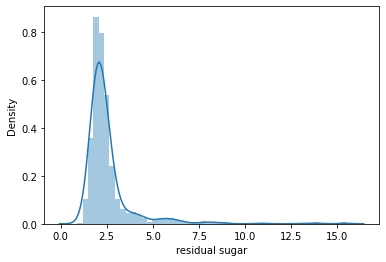

In [23]:
sns.distplot(df["residual sugar"])

In [24]:
from scipy.stats import boxcox
df_new["residual sugar"]=boxcox(df_new["residual sugar"],0)

In [25]:
df_new.skew()

fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar          1.227096
chlorides               2.275162
free sulfur dioxide     0.869250
total sulfur dioxide    1.183161
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
quality                 0.407865
goodquality             2.094941
dtype: float64

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

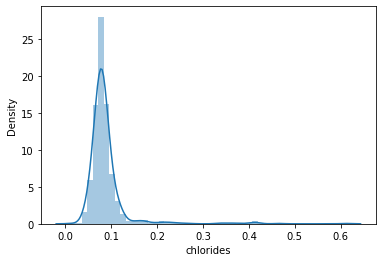

In [26]:
sns.distplot(df["chlorides"])

In [27]:
df_new["chlorides"]=boxcox(df_new["chlorides"],0)

In [28]:
df_new.skew()

fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar          1.227096
chlorides               0.496272
free sulfur dioxide     0.869250
total sulfur dioxide    1.183161
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
quality                 0.407865
goodquality             2.094941
dtype: float64

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

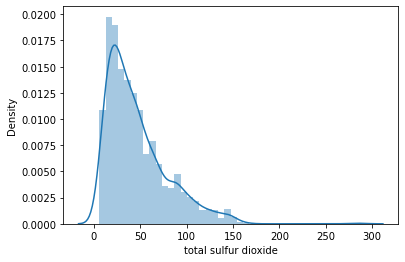

In [29]:
sns.distplot(df["total sulfur dioxide"])

In [30]:
df_new["total sulfur dioxide"]=boxcox(df_new["total sulfur dioxide"],0.5)

In [31]:
df_new.skew()

fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar          1.227096
chlorides               0.496272
free sulfur dioxide     0.869250
total sulfur dioxide    0.557106
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
quality                 0.407865
goodquality             2.094941
dtype: float64

THUS SKEWNESS IS REMOVED FROM THE DATASET USING Z-SCORE AND BOXCOX METHOD

<AxesSubplot:>

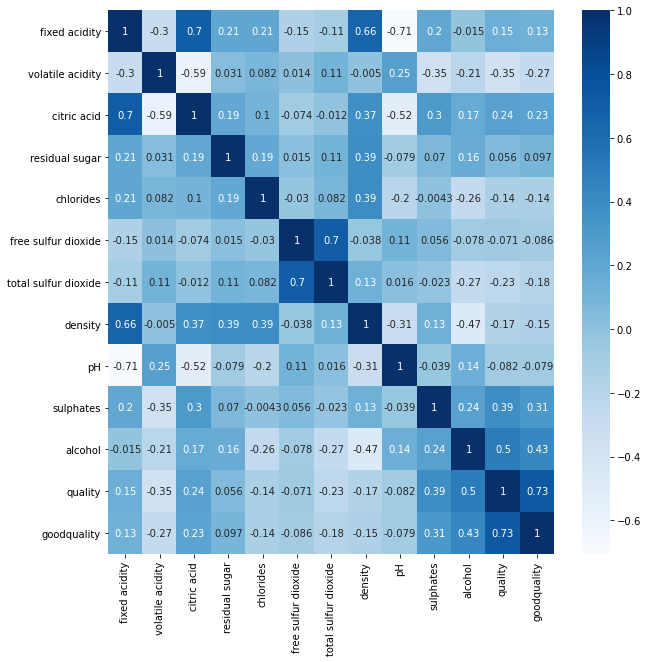

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(df_new.corr(),annot=True,cmap="Blues")

FROM HEATMAP THE COLUMN VOLATILE ACIDITY IS NOT MUCH CORRELATED WITH OUR TARGET COLUMN.THUS IT CAN BE REMOVED

In [33]:
df_new.drop("volatile acidity",axis=1,inplace=True)
df_new

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
0,7.4,0.00,0.641854,-2.577022,11.0,9.661904,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.00,0.955511,-2.322788,25.0,14.370706,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.04,0.832909,-2.385967,15.0,12.696938,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.56,0.641854,-2.590267,17.0,13.491933,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.00,0.641854,-2.577022,11.0,9.661904,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.08,0.693147,-2.407946,32.0,11.266499,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.10,0.788457,-2.780621,39.0,12.282857,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.13,0.832909,-2.577022,29.0,10.649111,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.12,0.693147,-2.590267,32.0,11.266499,0.99547,3.57,0.71,10.2,5,0


USING STANDARD SCALER FOR BETTER LEARNING OF THE MACHINE

In [35]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
trainx=scale.fit_transform(trainx)

In [36]:
trainx

array([[-0.64085619,  1.33325677, -1.64918718, ..., -0.87158723,
        -1.31429877, -1.32483348],
       [-0.41703581,  2.38760577, -1.64918718, ..., -0.1068612 ,
        -0.95686616, -1.32483348],
       [-0.41703581,  1.68470644, -1.44135883, ..., -0.29804271,
        -0.95686616, -1.32483348],
       ...,
       [ 0.29756697, -1.76231102,  0.72234219, ...,  0.26957479,
         0.87649493,  0.85613123],
       [-0.73665136,  0.10418716, -0.14510397, ..., -0.22674101,
        -0.63272563,  0.85613123],
       [-0.12676963, -0.87245283,  0.53788105, ...,  0.464692  ,
         1.61218256,  0.85613123]])

MACHINE LEARNING PROCESS

In [37]:
max_acc=0
max_rs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,test_size=.30,random_state=i) 
    m=DecisionTreeClassifier()
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    acc=accuracy_score(predm,y_test)   
       
    if acc>max_acc:
        max_acc=acc
        max_rs=i
print("best accuracy=",max_acc,"on random state",max_rs)

best accuracy= 1.0 on random state 1


In [38]:
x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,test_size=.30,random_state=1)

In [39]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print(accuracy_score(pred,y_test))
print(confusion_matrix(pred,y_test))
print(classification_report(pred,y_test))

1.0
[[403   0]
 [  0 427]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       403
           1       1.00      1.00      1.00       427

    accuracy                           1.00       830
   macro avg       1.00      1.00      1.00       830
weighted avg       1.00      1.00      1.00       830



In [40]:
dtc=DecisionTreeClassifier()  #criterion="gini" --->Default / criterion="entropy"
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(preddtc,y_test))
print(confusion_matrix(preddtc,y_test))
print(classification_report(preddtc,y_test))

1.0
[[403   0]
 [  0 427]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       403
           1       1.00      1.00      1.00       427

    accuracy                           1.00       830
   macro avg       1.00      1.00      1.00       830
weighted avg       1.00      1.00      1.00       830



In [41]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(predsvc,y_test))
print(confusion_matrix(predsvc,y_test))
print(classification_report(predsvc,y_test))

1.0
[[403   0]
 [  0 427]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       403
           1       1.00      1.00      1.00       427

    accuracy                           1.00       830
   macro avg       1.00      1.00      1.00       830
weighted avg       1.00      1.00      1.00       830



In [42]:
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)
pred=kn.predict(x_test)
print(accuracy_score(pred,y_test))
print(confusion_matrix(pred,y_test))
print(classification_report(pred,y_test))

0.9698795180722891
[[379   1]
 [ 24 426]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       380
           1       1.00      0.95      0.97       450

    accuracy                           0.97       830
   macro avg       0.97      0.97      0.97       830
weighted avg       0.97      0.97      0.97       830



CROSS VALIDATION PROCESS

In [43]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(kn,trainx,trainy,cv=10)                    #CV should to changed untill one gets max accuracy
print(score)
print(score.mean())
print(score.std())

[0.97833935 1.         0.93501805 0.92057762 0.99275362 0.96376812
 0.93115942 0.97826087 0.9673913  0.98188406]
0.9649152409354889
0.025804530964548975


In [44]:
score=cross_val_score(svc,trainx,trainy,cv=10)
print(score)
print(score.mean())
print(score.std())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1.0
0.0


In [45]:
score=cross_val_score(dtc,trainx,trainy,cv=10)
print(score)
print(score.mean())
print(score.std())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1.0
0.0


In [46]:
score=cross_val_score(rf,trainx,trainy,cv=10)
print(score)
print(score.mean())
print(score.std())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1.0
0.0


RandomForestClassifier is the best model as there is less diff between cross_val_score and the actual accuracy

HYPERPARAMETER TUNING PROCESS FOR THE BEST MODEL

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
parameter={"max_depth": np.arange(2,10),
          "criterion": ["gini","entropy"],
          "max_leaf_nodes": np.arange(2,10),
          "max_features": ["auto","sqrt","log2"]}

In [49]:
gcv=GridSearchCV(RandomForestClassifier(),parameter,cv=10)

In [50]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [51]:
gcv.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'auto',
 'max_leaf_nodes': 4}

In [52]:
final_model=RandomForestClassifier(criterion='gini',max_depth=2,max_features='auto',max_leaf_nodes=4)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
print(accuracy_score(pred,y_test))

1.0


Plotting AUC-ROC curve for the best model

In [53]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [54]:
y_pred_prob=final_model.predict_proba(x_test)[:,1]
y_pred_prob

array([0.74522883, 0.32985018, 0.8415929 , 0.73094098, 0.24947348,
       0.13719511, 0.83838285, 0.85316848, 0.83374599, 0.17150764,
       0.10053993, 0.76519468, 0.08949502, 0.84529985, 0.22799626,
       0.33545557, 0.74892033, 0.83448968, 0.84934171, 0.10525947,
       0.83141026, 0.37898872, 0.19402089, 0.7846143 , 0.10002169,
       0.84472029, 0.85490346, 0.81428249, 0.20437241, 0.13982542,
       0.85181681, 0.74892033, 0.30886383, 0.09681217, 0.83826345,
       0.0639393 , 0.85749528, 0.29514829, 0.33782863, 0.19273765,
       0.78491345, 0.33806658, 0.74204897, 0.24221843, 0.11422182,
       0.47038601, 0.24383346, 0.06057034, 0.15241645, 0.8595216 ,
       0.84975475, 0.1414427 , 0.35813517, 0.10969671, 0.70972537,
       0.77707347, 0.84086774, 0.38389411, 0.2077211 , 0.10331538,
       0.19845051, 0.80797508, 0.84319416, 0.74118427, 0.76989173,
       0.07221495, 0.76689004, 0.29273706, 0.85571182, 0.37191962,
       0.79292846, 0.29780997, 0.1038251 , 0.84463145, 0.10053

In [55]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

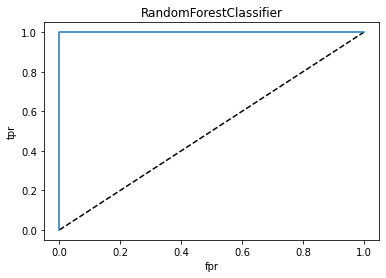

In [56]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="RandomForestClassifier")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("RandomForestClassifier")
plt.show()

In [57]:
auc_score=roc_auc_score(y_test,rf.predict(x_test))
auc_score

1.0

saving the best model

In [58]:
import joblib

joblib.dump(final_model,"redwine-quality.obj")

['redwine-quality.obj']

In [59]:
redwinequality_from_joblib=joblib.load("redwine-quality.obj")
redwinequality_from_joblib.predict(x_test)

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,